In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from IPython.display import display, clear_output
from py_src.net import get_model

In [4]:
INPUT_WIDTH = 256
INPUT_HEIGHT = 256
CHANNELS = 3
OUTPUT_WIDTH = 16
WEIGHTS_HEIGHT = 31744
WEIGHTS_WIDTH = 16

train_dir = "./dataset/cats_and_dogs_256x256/train/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(INPUT_WIDTH, INPUT_HEIGHT),
    batch_size=1,
    class_mode='binary',
)

model = get_model()
print("Loading model")
model.load_weights("./models/cats_dogs_net.h5")
print("Model loaded")

Found 9892 images belonging to 2 classes.
Loading model
Model loaded


2024-04-26 14:09:29.762636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 14:09:29.762964: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Accuracy: 95.0 %


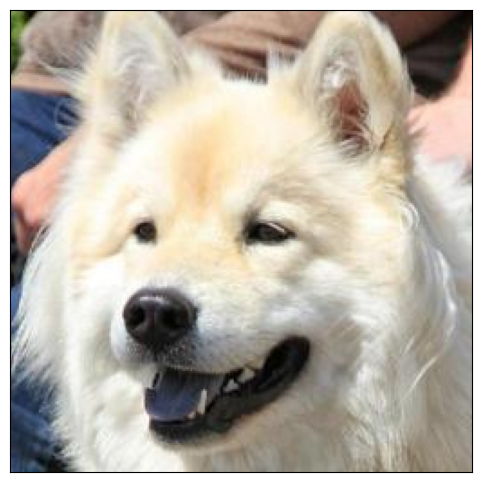

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
MAX_ITERATIONS = 20
accuracy = 0
for (sample, expected_class), i in zip(train_generator, range(MAX_ITERATIONS)):
    ax.clear()
    ax.imshow(sample[0] * (1/255))
    ax.set_yticks([])
    ax.set_xticks([])
    clear_output(wait=True)
    display(fig)
    counter = 0
    start = time.time()
    while start + 2 > time.time():
        prediction = model.predict(sample, verbose=0)
        counter += 1

    time_taken = time.time() - start
    classified = "DOG" if prediction[0, 0] >= 0.5 else "CAT"
    expected_class = "DOG" if expected_class[0] >= 0.5 else "CAT"
    print(f"Image {i + 1} of {MAX_ITERATIONS}")
    print(f"Classified as: {classified},\texpected: {expected_class}")
    print(f"FPS: {counter / time_taken}")
    accuracy += classified == expected_class
    time.sleep(1.5)

clear_output(wait=True)
print(f"Accuracy: {accuracy / MAX_ITERATIONS * 100} %")